In [1]:
# Sequencial Gaussian Simulation

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Exponential, NScaler
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [3]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df2 = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
dcp2 = CloudPoints().from_df(df2, x='X',y='Y', fields=['Facies','Porosity','Perm'])
dcp2.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,1.0,0.115359,5.736104
1,100.0,800.0,None,None,1.0,0.136425,17.211462
2,100.0,600.0,None,None,1.0,0.135810,43.724752
3,100.0,500.0,None,None,0.0,0.094414,1.609942
4,100.0,100.0,None,None,0.0,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,1.0,0.109411,3.247265
285,190.0,419.0,None,None,0.0,0.099541,1.528003
286,920.0,379.0,None,None,0.0,0.094099,2.514597
287,60.0,149.0,None,None,0.0,0.100167,3.636854


<AxesSubplot:>

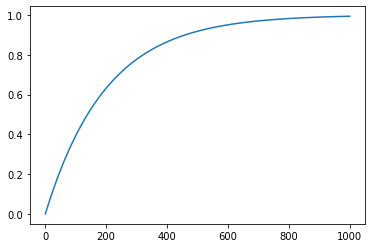

In [4]:
s = Exponential(
    sill = 1.,
    range = 200,
    nugget = 0.
)

s.plot(np.linspace(0,1000,50))

In [5]:
sc = NScaler()
sc.fit(dcp2.df()['Porosity'])
pnorm = sc.transform(dcp2.df()['Porosity'])
dcp2.add_field(pnorm, 'pnorm')
dcp2.df().describe()

,x,y,Facies,Porosity,Perm,pnorm
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,475.813149,529.692042,0.813149,0.134744,207.832368,-0.005546
std,254.277530,300.895374,0.390468,0.037745,559.359350,1.064579
min,0.000000,9.000000,0.000000,0.058548,0.075819,-6.361341
25%,300.000000,269.000000,1.000000,0.106318,3.634086,-0.713471
50%,430.000000,549.000000,1.000000,0.126167,14.908970,-0.011715
75%,670.000000,819.000000,1.000000,0.154220,71.454424,0.683694
max,990.000000,999.000000,1.000000,0.228790,5308.842566,6.361341


In [6]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')


In [7]:
wm = s.sgs(dcp2,cp2,v='pnorm')

df_un = wm.df()
df_un['porosity'] = sc.inverse(df_un['pnorm'])
df_un

1920
1293
470
1959
2440
13
680
155
1083


KeyboardInterrupt: 

In [ ]:
wm.add_fields_from_df(df_un, ['porosity'])

wm.df()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wm.plot_mesh('porosity',ax=ax[0])
dcp2.plot(ax=ax[1], hue='Porosity', palette='viridis')

In [ ]:
data=wm.df()
data.describe()

In [ ]:
sns.displot(data=data.reset_index(), x='porosity', kde=False)

In [ ]:
sns.displot(data=dcp2.df().reset_index(), x='Porosity', kde=False)

In [ ]:
wm.df().columns

In [ ]:
dfsm, sm = wm.variogram('pnorm',lag_dist=50, lag_tol=10,nlags=20)
fig, ax = plt.subplots(1,1,figsize=(15,7))

sns.scatterplot(data=sm, x='lag', y='var', ax=ax)
s.plot(np.linspace(0,1000,20),ax=ax)